<a href="https://colab.research.google.com/github/vaishnaviko/MLProject/blob/main/Copy_of_MLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Gathering

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv('/content/insurance_claims.csv')

In [ ]:
df #dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.shape #no.of rows and columns

(1000, 40)

##Data Preperation

In [ ]:
#Intuitive Data Modification
df=df.drop(['policy_number','_c39'],axis=1) #we removed the columns as they don't support the dataset to determine if the new datapoint is fraud or not fraud

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
df.dtypes #datatype of each column

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

object is a string column

In [ ]:
df['incident_date']=pd.to_datetime(df['incident_date']) #typecasting object(string) to datetime datatype

In [ ]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date']) #typecasting

In [ ]:
df['months_between_incident_and_bind']=(df['incident_date']-df['policy_bind_date'])/np.timedelta64(1,'M') #new column added

changing dates to months

In [ ]:
df['months_between_incident_and_bind']=df['months_between_incident_and_bind'].astype(int) #typecasting

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_between_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,100
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,170
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,278
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,140
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,38


In [ ]:
df['incident_within_customership']=df[['months_between_incident_and_bind','months_as_customer']].apply(lambda x: 1 if x.months_as_customer>=x.months_between_incident_and_bind and x.months_between_incident_and_bind>0 else 0,axis=1) #new column added

lambda means for each

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_between_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,100,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,170,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,278,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,140,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,38,1


In [ ]:
df['capital-loss']

0          0
1          0
2          0
3     -62400
4     -46000
       ...  
995        0
996        0
997        0
998        0
999        0
Name: capital-loss, Length: 1000, dtype: int64

In [ ]:
df['capital-loss']=df['capital-loss'].abs() #absolute value

##Data Quality Checks

In [ ]:
df.dtypes #checking if all the datatypes are correct for it's respective column

months_as_customer                           int64
age                                          int64
policy_bind_date                    datetime64[ns]
policy_state                                object
policy_csl                                  object
policy_deductable                            int64
policy_annual_premium                      float64
umbrella_limit                               int64
insured_zip                                  int64
insured_sex                                 object
insured_education_level                     object
insured_occupation                          object
insured_hobbies                             object
insured_relationship                        object
capital-gains                                int64
capital-loss                                 int64
incident_date                       datetime64[ns]
incident_type                               object
collision_type                              object
incident_severity              

In [ ]:
#checking negative values are present or not in int or float as column datatype
dict(df.dtypes)

{'months_as_customer': dtype('int64'),
 'age': dtype('int64'),
 'policy_bind_date': dtype('<M8[ns]'),
 'policy_state': dtype('O'),
 'policy_csl': dtype('O'),
 'policy_deductable': dtype('int64'),
 'policy_annual_premium': dtype('float64'),
 'umbrella_limit': dtype('int64'),
 'insured_zip': dtype('int64'),
 'insured_sex': dtype('O'),
 'insured_education_level': dtype('O'),
 'insured_occupation': dtype('O'),
 'insured_hobbies': dtype('O'),
 'insured_relationship': dtype('O'),
 'capital-gains': dtype('int64'),
 'capital-loss': dtype('int64'),
 'incident_date': dtype('<M8[ns]'),
 'incident_type': dtype('O'),
 'collision_type': dtype('O'),
 'incident_severity': dtype('O'),
 'authorities_contacted': dtype('O'),
 'incident_state': dtype('O'),
 'incident_city': dtype('O'),
 'incident_location': dtype('O'),
 'incident_hour_of_the_day': dtype('int64'),
 'number_of_vehicles_involved': dtype('int64'),
 'property_damage': dtype('O'),
 'bodily_injuries': dtype('int64'),
 'witnesses': dtype('int64'),

In [ ]:
for i in dict(df.dtypes):
  print(i)#i will store column names

months_as_customer
age
policy_bind_date
policy_state
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
capital-loss
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
auto_year
fraud_reported
months_between_incident_and_bind
incident_within_customership


In [ ]:
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    print(i,":",df[df[i]<0].shape[0]) #no.of rows in each column which are having negative values

months_as_customer : 0
age : 0
policy_deductable : 0
policy_annual_premium : 0
umbrella_limit : 1
insured_zip : 0
capital-gains : 0
capital-loss : 0
incident_hour_of_the_day : 0
number_of_vehicles_involved : 0
bodily_injuries : 0
witnesses : 0
total_claim_amount : 0
injury_claim : 0
property_claim : 0
vehicle_claim : 0
auto_year : 0
months_between_incident_and_bind : 0
incident_within_customership : 0


In [ ]:
df['umbrella_limit']=df['umbrella_limit'].abs() #absolute value or we can remove the row

In [ ]:
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    print(i,":",df[df[i]<0].shape[0])

months_as_customer : 0
age : 0
policy_deductable : 0
policy_annual_premium : 0
umbrella_limit : 0
insured_zip : 0
capital-gains : 0
capital-loss : 0
incident_hour_of_the_day : 0
number_of_vehicles_involved : 0
bodily_injuries : 0
witnesses : 0
total_claim_amount : 0
injury_claim : 0
property_claim : 0
vehicle_claim : 0
auto_year : 0
months_between_incident_and_bind : 0
incident_within_customership : 0


In [ ]:
#custom data quality check
print(df[df['total_claim_amount']!=df['injury_claim']+df['property_claim']+df['vehicle_claim']].shape[0])

0


##Outlier Handling and Missing values

In [ ]:
#1.Outlier Handling
#a. Boxplot -> any point lying outside the box it is an outlier
import matplotlib.pyplot as plt

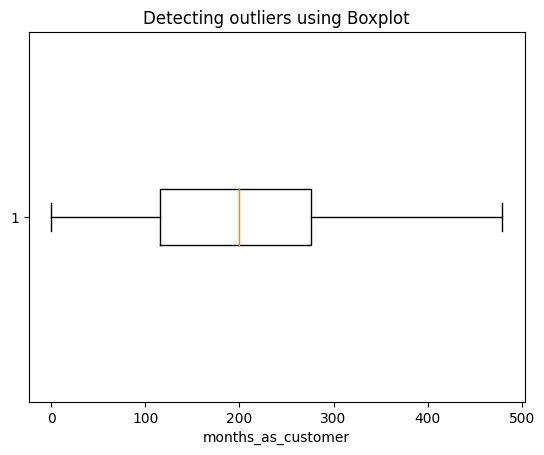

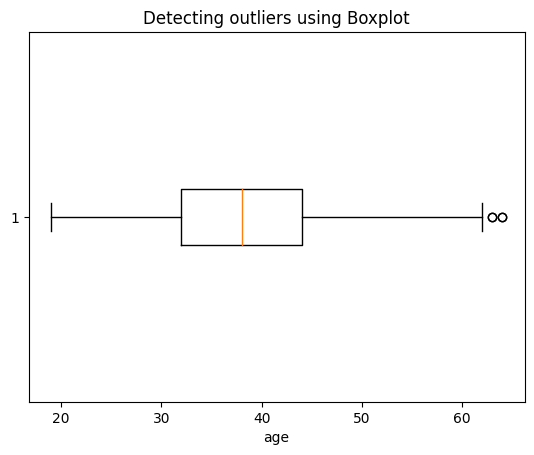

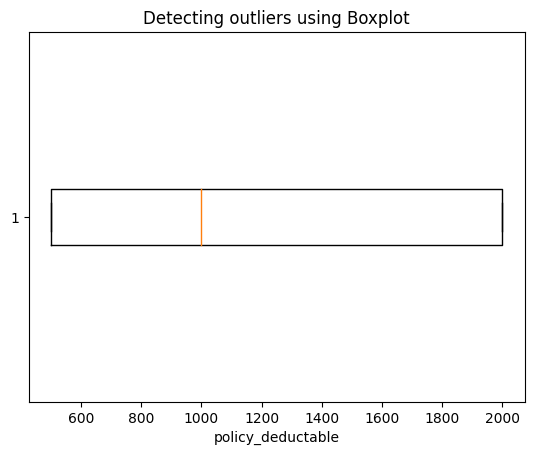

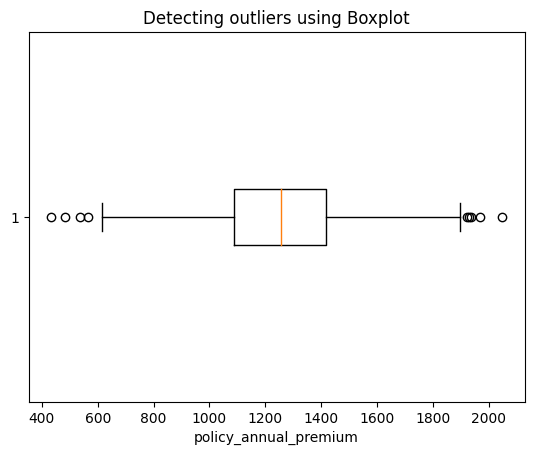

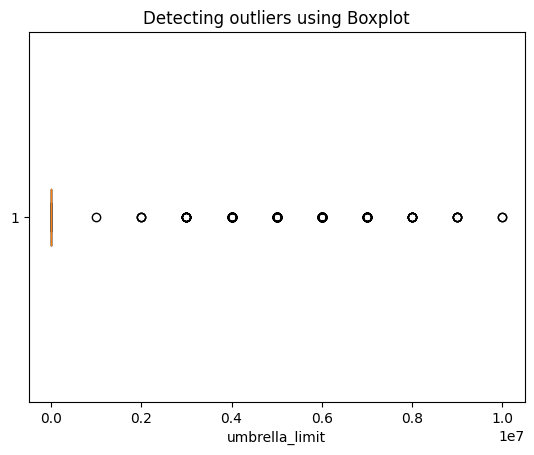

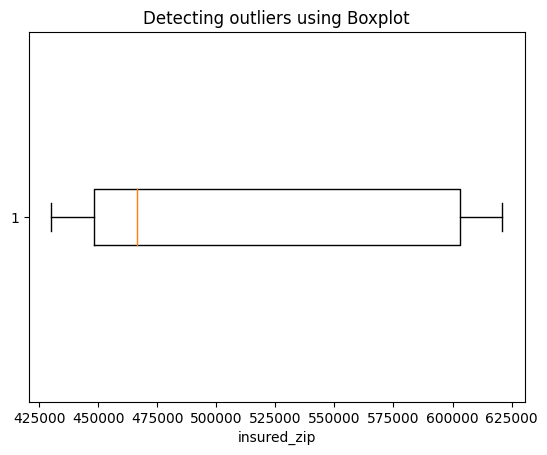

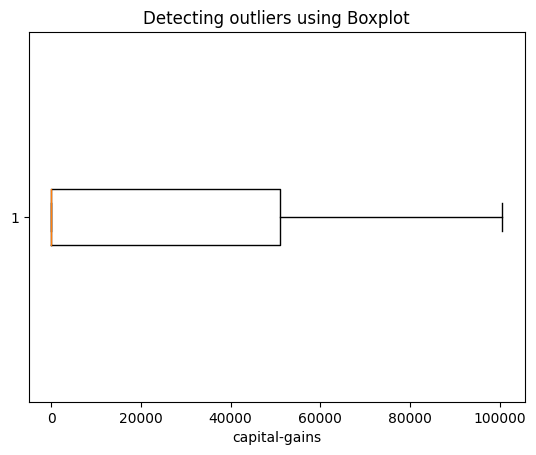

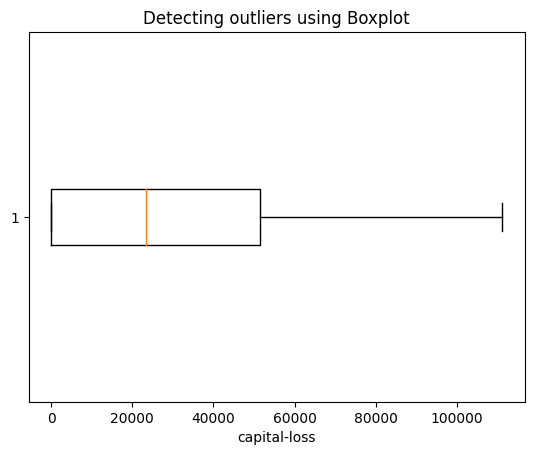

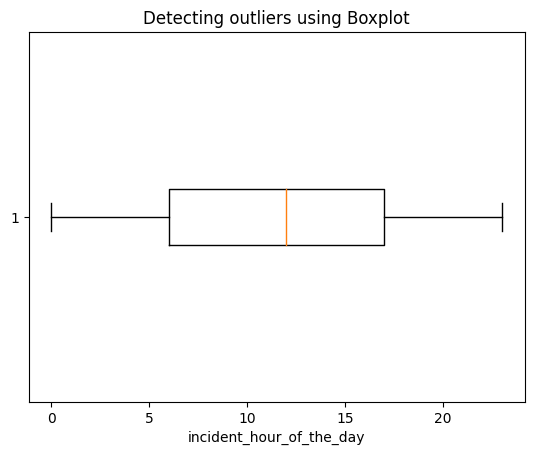

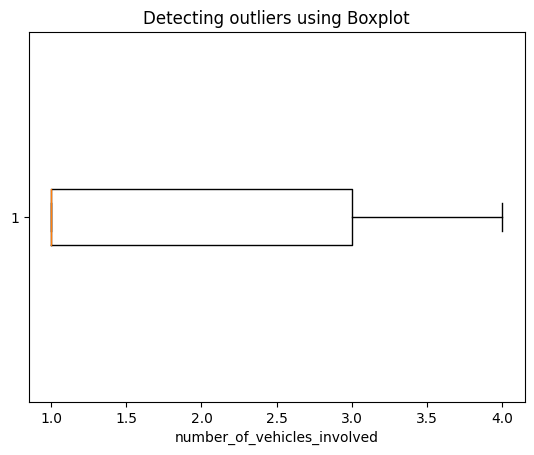

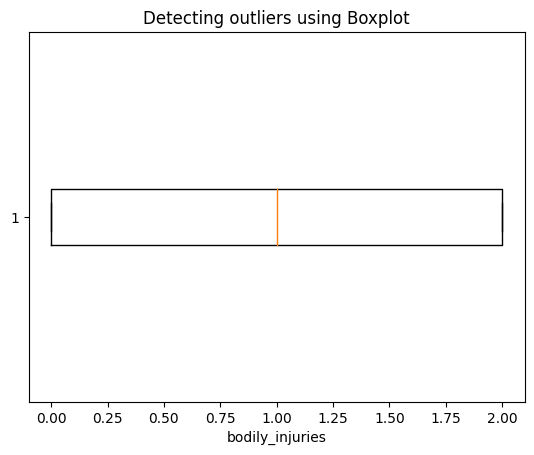

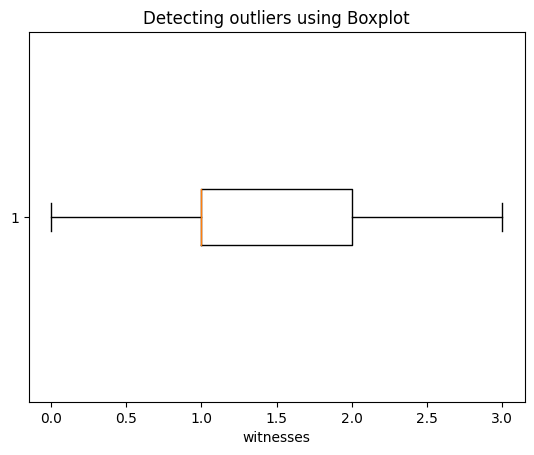

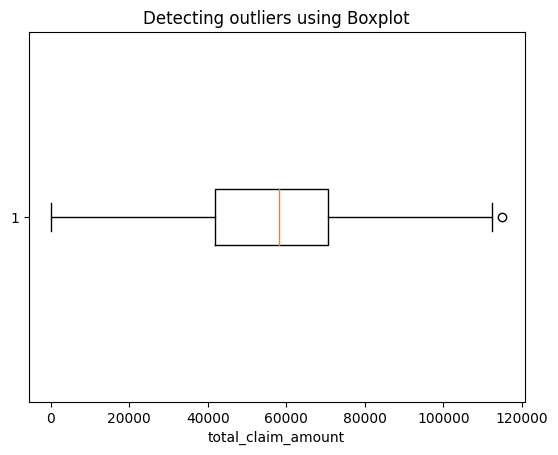

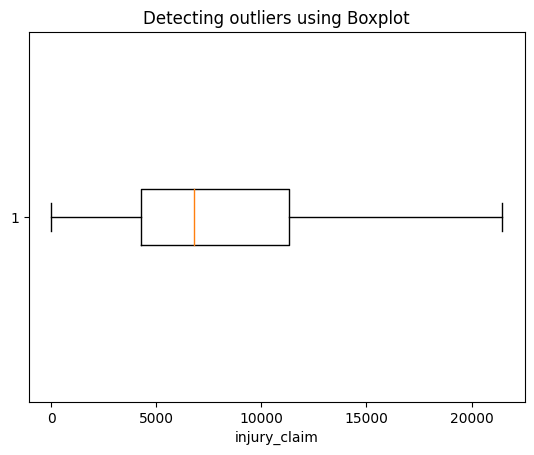

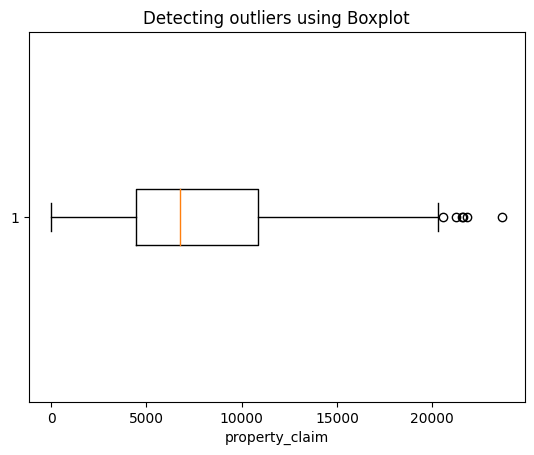

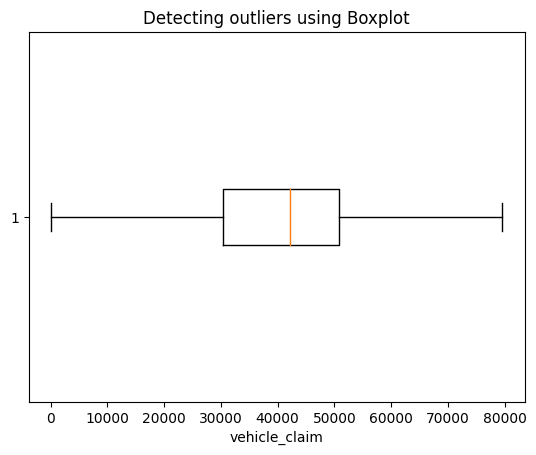

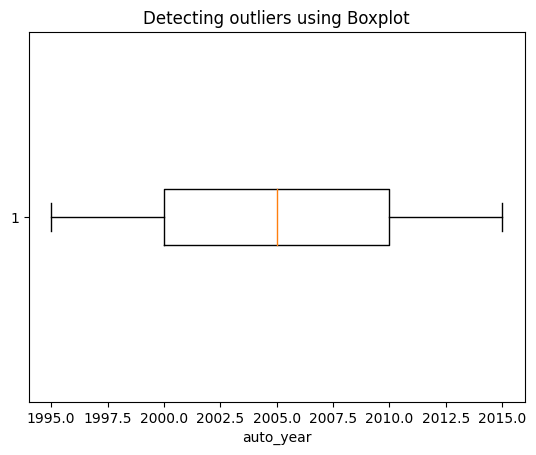

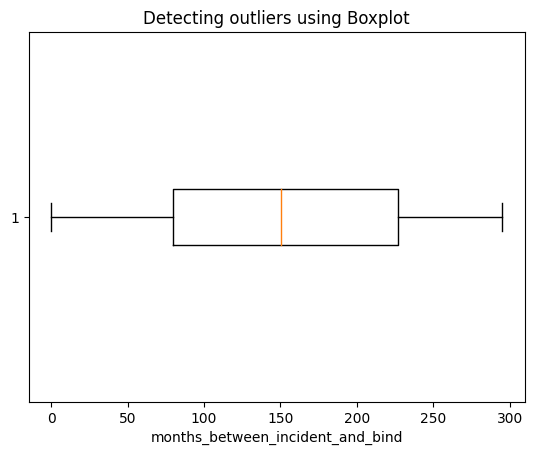

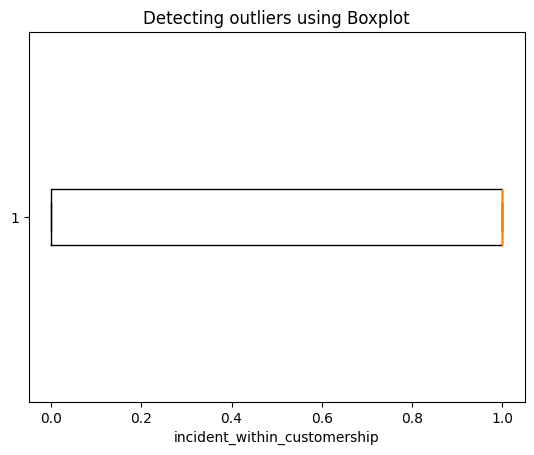

In [ ]:
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    plt.boxplot(df[i],vert=False)#vert=False is to make the plot as horizantal plot
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel(i)
    plt.show()

In [ ]:
#b. z-score -> By checking points which lie after the 3SD are outliers
def detect_outliers_zscore(data):#data is a variable and used as an argument in the function
  outliers=[] #empty list
  thres=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>thres:
      outliers.append(i)
  return outliers

In [ ]:
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    sample_outliers=detect_outliers_zscore(df[i])
    print("Column: ",i)
    print("Outliers from Z-scores method: ",sample_outliers)
    if len(sample_outliers)>0:
      median = np.median(df[i])
      for j in sample_outliers:
        df[i]=np.where(df[i]==j,median,df[i])#we replace outliers in each column by median
      print("After treatment: ")
      sample_outliers=detect_outliers_zscore(df[i])
      print("Outliers from Z-scores method: ",sample_outliers)


Column:  months_as_customer
Outliers from Z-scores method:  []
Column:  age
Outliers from Z-scores method:  []
Column:  policy_deductable
Outliers from Z-scores method:  []
Column:  policy_annual_premium
Outliers from Z-scores method:  [2047.59, 433.33, 484.67]
After treatment: 
Outliers from Z-scores method:  []
Column:  umbrella_limit
Outliers from Z-scores method:  [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
After treatment: 
Outliers from Z-scores method:  []
Column:  insured_zip
Outliers from Z-scores method:  []
Column:  capital-gains
Outliers from Z-scores method:  []
Column:  capital-loss
Outliers from Z-scores method:  [111100]
After treatment: 
Outliers from Z-scores method:  []
Column:  incident_hour_of_the_day
Outliers from Z-scores method:  []
Column:  number_of_vehicles_involved
Outliers from Z-scores method:  []
Column:  bodily_injuries
Outliers from Z-scores method:  []
Column:

In [ ]:
#2. Missing values
df.isnull() #for finding missing values gives

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_between_incident_and_bind,incident_within_customership
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #authorities_contacted->91(none means null)

months_as_customer                   0
age                                  0
policy_bind_date                     0
policy_state                         0
policy_csl                           0
policy_deductable                    0
policy_annual_premium                0
umbrella_limit                       0
insured_zip                          0
insured_sex                          0
insured_education_level              0
insured_occupation                   0
insured_hobbies                      0
insured_relationship                 0
capital-gains                        0
capital-loss                         0
incident_date                        0
incident_type                        0
collision_type                       0
incident_severity                    0
authorities_contacted               91
incident_state                       0
incident_city                        0
incident_location                    0
incident_hour_of_the_day             0
number_of_vehicles_involv

In [ ]:
df['authorities_contacted']=df['authorities_contacted'].replace(np.NaN,'NONE')

In [ ]:
df.isnull().sum()

months_as_customer                  0
age                                 0
policy_bind_date                    0
policy_state                        0
policy_csl                          0
policy_deductable                   0
policy_annual_premium               0
umbrella_limit                      0
insured_zip                         0
insured_sex                         0
insured_education_level             0
insured_occupation                  0
insured_hobbies                     0
insured_relationship                0
capital-gains                       0
capital-loss                        0
incident_date                       0
incident_type                       0
collision_type                      0
incident_severity                   0
authorities_contacted               0
incident_state                      0
incident_city                       0
incident_location                   0
incident_hour_of_the_day            0
number_of_vehicles_involved         0
property_dam

In [ ]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4        NONE
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [ ]:
#replace ? with
df=df.replace('?',np.NaN)

In [ ]:
df.isnull().sum()

months_as_customer                    0
age                                   0
policy_bind_date                      0
policy_state                          0
policy_csl                            0
policy_deductable                     0
policy_annual_premium                 0
umbrella_limit                        0
insured_zip                           0
insured_sex                           0
insured_education_level               0
insured_occupation                    0
insured_hobbies                       0
insured_relationship                  0
capital-gains                         0
capital-loss                          0
incident_date                         0
incident_type                         0
collision_type                      178
incident_severity                     0
authorities_contacted                 0
incident_state                        0
incident_city                         0
incident_location                     0
incident_hour_of_the_day              0


In [ ]:
df.nunique() #no.of unique values in each column

months_as_customer                   391
age                                   46
policy_bind_date                     951
policy_state                           3
policy_csl                             3
policy_deductable                      3
policy_annual_premium                989
umbrella_limit                         8
insured_zip                          995
insured_sex                            2
insured_education_level                7
insured_occupation                    14
insured_hobbies                       20
insured_relationship                   6
capital-gains                        338
capital-loss                         354
incident_date                         60
incident_type                          4
collision_type                         3
incident_severity                      4
authorities_contacted                  5
incident_state                         7
incident_city                          7
incident_location                   1000
incident_hour_of

In [ ]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [ ]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [ ]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
df.isnull().sum()

months_as_customer                  0
age                                 0
policy_bind_date                    0
policy_state                        0
policy_csl                          0
policy_deductable                   0
policy_annual_premium               0
umbrella_limit                      0
insured_zip                         0
insured_sex                         0
insured_education_level             0
insured_occupation                  0
insured_hobbies                     0
insured_relationship                0
capital-gains                       0
capital-loss                        0
incident_date                       0
incident_type                       0
collision_type                      0
incident_severity                   0
authorities_contacted               0
incident_state                      0
incident_city                       0
incident_location                   0
incident_hour_of_the_day            0
number_of_vehicles_involved         0
property_dam

In [ ]:
#incident_location is unqiue for everyone
df=df.drop(['incident_location'],axis=1)

##Feature Engineering

In [ ]:
df.shape[1]

39

In [ ]:
#Eliminating less important or not important features(generally we keep 25 to 30 features)

In [ ]:
# 1.Encoding
mappings ={}
for i in dict(df.dtypes):
  if dict(df.dtypes)[i]=='O':#object or O
   mappings[i] = dict(zip(df[i].unique(),range(len(df[i].unique()))))
print(mappings)


{'policy_state': {'OH': 0, 'IN': 1, 'IL': 2}, 'policy_csl': {'250/500': 0, '100/300': 1, '500/1000': 2}, 'insured_sex': {'MALE': 0, 'FEMALE': 1}, 'insured_education_level': {'MD': 0, 'PhD': 1, 'Associate': 2, 'Masters': 3, 'High School': 4, 'College': 5, 'JD': 6}, 'insured_occupation': {'craft-repair': 0, 'machine-op-inspct': 1, 'sales': 2, 'armed-forces': 3, 'tech-support': 4, 'prof-specialty': 5, 'other-service': 6, 'priv-house-serv': 7, 'exec-managerial': 8, 'protective-serv': 9, 'transport-moving': 10, 'handlers-cleaners': 11, 'adm-clerical': 12, 'farming-fishing': 13}, 'insured_hobbies': {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}, 'insured_relationship': {'husband': 0, 'other-relative': 1, 'own-child': 2, 'unmarrie

In [ ]:
mappings ={}
for i in dict(df.dtypes):
  if dict(df.dtypes)[i]=='O':#object or O
   mappings[i] = dict(zip(df[i].unique(),range(len(df[i].unique()))))
   df[i]=df[i].map(lambda x:mappings[i][x])


In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_between_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0.0,466132,0,...,71610,6510,13020.0,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000.0,468176,0,...,5070,780,780.0,3510,1,1,2007,0,100,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000.0,430632,1,...,34650,7700,3850.0,23100,2,2,2007,1,170,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000.0,608117,1,...,63400,6340,6340.0,50720,3,3,2014,0,290,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000.0,610706,0,...,6500,1300,650.0,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0.0,431289,1,...,87200,17440,8720.0,61040,12,31,2006,1,278,0
996,285,41,2014-01-05,2,1,1000,1436.79,0.0,608177,1,...,108480,18080,18080.0,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000.0,442797,1,...,67500,7500,7500.0,52500,9,17,1996,1,140,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000.0,441714,0,...,46980,5220,5220.0,36540,6,7,1998,1,38,1


In [ ]:
df.dtypes

months_as_customer                           int64
age                                          int64
policy_bind_date                    datetime64[ns]
policy_state                                 int64
policy_csl                                   int64
policy_deductable                            int64
policy_annual_premium                      float64
umbrella_limit                             float64
insured_zip                                  int64
insured_sex                                  int64
insured_education_level                      int64
insured_occupation                           int64
insured_hobbies                              int64
insured_relationship                         int64
capital-gains                                int64
capital-loss                               float64
incident_date                       datetime64[ns]
incident_type                                int64
collision_type                               int64
incident_severity              

In [ ]:
#Feature selection
import seaborn as sns #used to handle visualizations

In [ ]:
plt.figure(figsize=(18,12))#size
corr = df.corr()
print(corr)

                                  months_as_customer       age  \
months_as_customer                          1.000000  0.922098   
age                                         0.922098  1.000000   
policy_bind_date                           -0.048173 -0.036941   
policy_state                                0.000328  0.014533   
policy_csl                                 -0.008876 -0.009876   
policy_deductable                           0.026807  0.029188   
policy_annual_premium                      -0.000399  0.007703   
umbrella_limit                              0.021358  0.014769   
insured_zip                                 0.017895  0.025604   
insured_sex                                -0.060925 -0.073337   
insured_education_level                    -0.074839 -0.076016   
insured_occupation                          0.004261  0.006836   
insured_hobbies                            -0.019333 -0.011810   
insured_relationship                        0.033866  0.057341   
capital-ga

<Figure size 1800x1200 with 0 Axes>

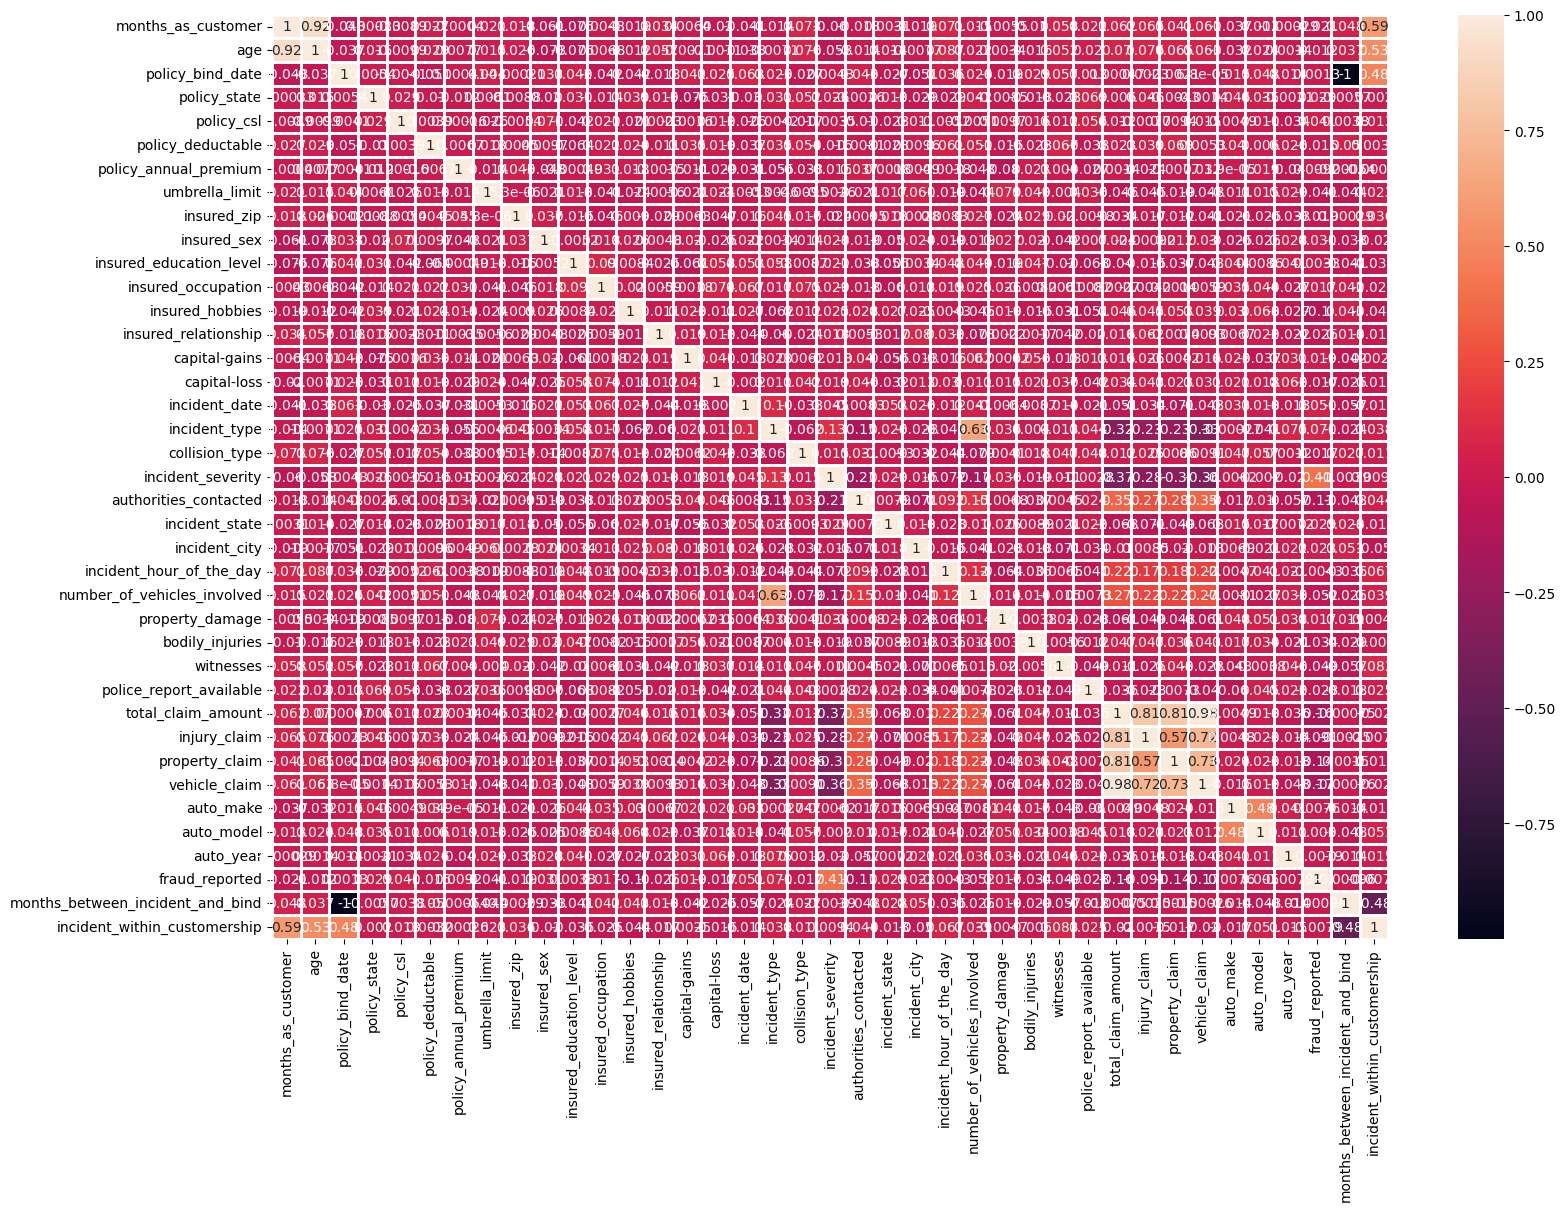

In [ ]:
plt.figure(figsize=(18,12))#size
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2g',linewidth=1)#fmt->decimal places
plt.show()

In [ ]:
df=df.drop('vehicle_claim',axis=1)

In [ ]:
df=df.drop(['policy_bind_date','incident_date'],axis=1)

In [ ]:
df.shape[1]

36

##Feature importances

In [ ]:
#Here we take a dummy model(Extra Trees Classifier model)
#scikit-learn->machine learing models
from sklearn.ensemble import ExtraTreesClassifier
y=df['fraud_reported']
x=df.drop('fraud_reported',axis=1)
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)#we remove least important features(we will remove last features)

[0.02559409 0.02744073 0.02532282 0.02337557 0.023657   0.02832497
 0.01674937 0.02837009 0.01712965 0.02579902 0.02933078 0.04002611
 0.02563972 0.02454014 0.02278235 0.01669849 0.02103892 0.15962542
 0.02865372 0.02710421 0.02543873 0.0261453  0.01618989 0.01801444
 0.02114339 0.02681867 0.01651092 0.0328741  0.02837974 0.02883009
 0.02640402 0.02565668 0.02657997 0.02659356 0.01721733]


In [ ]:
#Finding 10 most important features
feature_importances = pd.Series(model.feature_importances_,index=x.columns)
print(feature_importances)

months_as_customer                  0.025594
age                                 0.027441
policy_state                        0.025323
policy_csl                          0.023376
policy_deductable                   0.023657
policy_annual_premium               0.028325
umbrella_limit                      0.016749
insured_zip                         0.028370
insured_sex                         0.017130
insured_education_level             0.025799
insured_occupation                  0.029331
insured_hobbies                     0.040026
insured_relationship                0.025640
capital-gains                       0.024540
capital-loss                        0.022782
incident_type                       0.016698
collision_type                      0.021039
incident_severity                   0.159625
authorities_contacted               0.028654
incident_state                      0.027104
incident_city                       0.025439
incident_hour_of_the_day            0.026145
number_of_

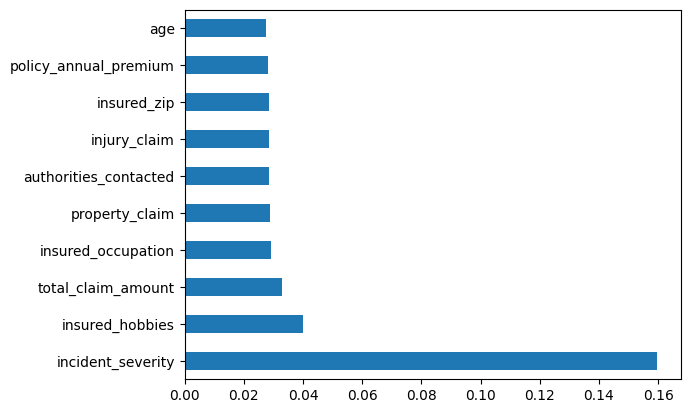

In [ ]:
feature_importances.nlargest(10).plot(kind='barh')#barh->bar horizantal for 10 imp features
plt.show()

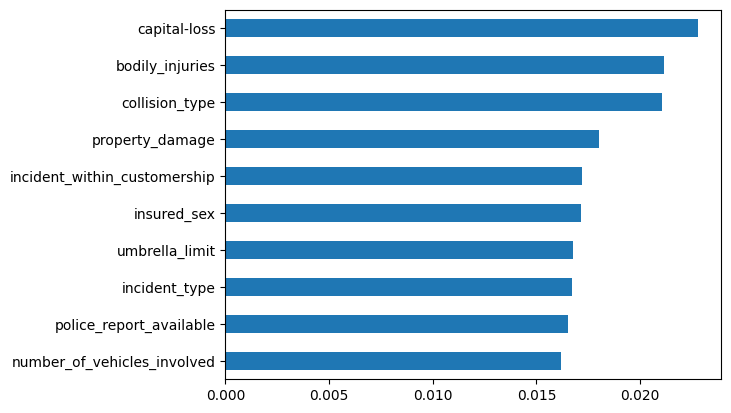

In [ ]:
#Finding 10 least important features
feature_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [ ]:
#removing least important columns with importance < 0.02
df = df.drop(['property_damage','incident_within_customership','insured_sex','umbrella_limit','incident_type','police_report_available','number_of_vehicles_involved'],axis=1)

In [ ]:
df.shape

(1000, 29)

In [ ]:
df#analytical dataset

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_between_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,1,2,71610,6510,13020.0,0,0,2004,0,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,0,0,5070,780,780.0,1,1,2007,0,100
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,2,3,34650,7700,3850.0,2,2,2007,1,170
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,1,2,63400,6340,6340.0,3,3,2014,0,290
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,0,1,6500,1300,650.0,4,4,2009,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,431289,3,0,12,...,0,1,87200,17440,8720.0,12,31,2006,1,278
996,285,41,2,1,1000,1436.79,608177,1,5,0,...,2,3,108480,18080,18080.0,13,27,2015,1,12
997,130,34,0,0,500,1383.49,442797,3,3,3,...,2,3,67500,7500,7500.0,9,17,1996,1,140
998,458,62,2,2,2000,1356.92,441714,2,11,4,...,0,1,46980,5220,5220.0,6,7,1998,1,38


##Model Training

In [ ]:
#Explanatory model building
from sklearn.model_selection import train_test_split
y=df['fraud_reported']
x=df.drop('fraud_reported',axis=1)

In [ ]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_between_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,5,1,2,71610,6510,13020.0,0,0,2004,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,8,0,0,5070,780,780.0,1,1,2007,100
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,7,2,3,34650,7700,3850.0,2,2,2007,170
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,5,1,2,63400,6340,6340.0,3,3,2014,290
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,20,0,1,6500,1300,650.0,4,4,2009,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,431289,3,0,12,...,20,0,1,87200,17440,8720.0,12,31,2006,278
996,285,41,2,1,1000,1436.79,608177,1,5,0,...,23,2,3,108480,18080,18080.0,13,27,2015,12
997,130,34,0,0,500,1383.49,442797,3,3,3,...,4,2,3,67500,7500,7500.0,9,17,1996,140
998,458,62,2,2,2000,1356.92,441714,2,11,4,...,2,0,1,46980,5220,5220.0,6,7,1998,38


In [ ]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
#Checking the performance
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.2)

In [ ]:
X_Train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_between_incident_and_bind
34,149,37,2,2,500,1415.68,603381,1,5,11,...,17,0,1,64800,10800,5400.0,6,10,1999,283
139,124,32,2,0,1000,1198.15,447925,0,6,10,...,19,0,2,73560,12260,12260.0,10,25,1995,267
407,269,45,1,2,500,1330.46,435552,4,1,0,...,5,0,0,24200,2200,4400.0,9,18,2008,216
856,290,45,0,2,2000,1215.36,617739,2,4,1,...,22,0,1,66200,6620,6620.0,9,17,2012,249
984,163,36,1,0,1000,1503.21,448190,0,6,18,...,1,2,1,51390,5710,11420.0,7,20,2013,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,479,60,2,1,2000,1304.83,473638,5,6,18,...,18,0,0,60600,5050,10100.0,12,26,2001,206
360,451,61,1,0,2000,1618.65,475407,2,10,15,...,3,2,1,78100,15620,7810.0,3,3,1997,195
774,70,28,2,0,1000,1319.81,613587,4,1,11,...,14,1,0,31680,3520,3520.0,7,8,2006,133
37,289,49,2,2,2000,1222.48,620757,6,7,5,...,16,1,1,5330,1230,820.0,9,15,2001,258


In [ ]:
Y_Train

34     1
139    1
407    1
856    1
984    1
      ..
514    1
360    0
774    1
37     1
529    0
Name: fraud_reported, Length: 800, dtype: int64

In [ ]:
X_Test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_between_incident_and_bind
132,112,27,0,1,500,965.13,450341,3,4,19,...,21,0,1,51000,8500,8500.0,5,6,2013,110
814,57,25,2,2,2000,1143.06,469363,3,4,7,...,0,0,1,72900,14580,14580.0,5,14,2010,223
546,230,43,1,1,2000,1221.14,473394,0,5,2,...,13,0,2,75460,13720,13720.0,6,7,2002,147
572,103,33,0,2,2000,1021.14,618418,3,6,12,...,1,2,3,79090,14380,14380.0,2,2,2014,239
719,241,43,1,0,1000,935.77,437422,2,5,5,...,21,1,0,7150,1300,650.0,13,35,2003,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,190,38,0,0,500,1246.03,442919,6,0,9,...,14,0,0,45100,9020,4510.0,5,14,2013,86
185,125,35,0,2,500,1054.83,446788,6,4,18,...,17,2,3,88660,8060,16120.0,1,22,2007,219
25,8,35,0,1,2000,1266.92,613982,3,2,15,...,16,1,3,71500,16500,11000.0,8,19,2006,12
14,180,38,0,0,2000,1301.13,476685,5,1,2,...,12,0,2,46200,4200,8400.0,2,12,2003,189


In [ ]:
Y_Test

132    1
814    1
546    1
572    1
719    1
      ..
955    1
185    0
25     0
14     0
591    0
Name: fraud_reported, Length: 200, dtype: int64

In [ ]:
#ML models
# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression #Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #Performance matrix

model = LogisticRegression()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test) #compare with y-test these x-test predictions

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.715

Classification report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200


Confusion matrix:
  [[  0  57]
 [  0 143]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# 2.K Nearest Neighbours(KNN approach)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.665

Classification report:
                precision    recall  f1-score   support

           0       0.27      0.11      0.15        57
           1       0.71      0.89      0.79       143

    accuracy                           0.67       200
   macro avg       0.49      0.50      0.47       200
weighted avg       0.59      0.67      0.61       200


Confusion matrix:
  [[  6  51]
 [ 16 127]]


In [ ]:
# 3.GaussianNB Classifier model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.715

Classification report:
                precision    recall  f1-score   support

           0       0.50      0.07      0.12        57
           1       0.72      0.97      0.83       143

    accuracy                           0.71       200
   macro avg       0.61      0.52      0.48       200
weighted avg       0.66      0.71      0.63       200


Confusion matrix:
  [[  4  53]
 [  4 139]]


In [ ]:
# 4.Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.75

Classification report:
                precision    recall  f1-score   support

           0       0.56      0.56      0.56        57
           1       0.83      0.83      0.83       143

    accuracy                           0.75       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.75      0.75      0.75       200


Confusion matrix:
  [[ 32  25]
 [ 25 118]]


In [ ]:
# 5.Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.79

Classification report:
                precision    recall  f1-score   support

           0       0.74      0.40      0.52        57
           1       0.80      0.94      0.87       143

    accuracy                           0.79       200
   macro avg       0.77      0.67      0.69       200
weighted avg       0.78      0.79      0.77       200


Confusion matrix:
  [[ 23  34]
 [  8 135]]


In [ ]:
# 6.XGB Classifier model
from xgboost import XGBClassifier #extreme gradient boosting

model = XGBClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.85

Classification report:
                precision    recall  f1-score   support

           0       0.75      0.70      0.73        57
           1       0.88      0.91      0.90       143

    accuracy                           0.85       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.85      0.85      0.85       200


Confusion matrix:
  [[ 40  17]
 [ 13 130]]
